In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
dataset = 'https://storage.googleapis.com/dqlab-dataset/Data%20Mission.csv'
data_df = pd.read_csv(dataset)

#Lakukan Encoding data kolom Label, 'profit' menjadi 1, 'loss' menjadi 0
mapping = {"Profit": 1, 'Loss':0}
data_df['Label'] = data_df['Label'].map(mapping)

In [4]:
data_df.head()

,Region,Discount,Top Product,Top Cust Segment,Top Branch,Top Sub-Product,Top City,Top Ship Mode,Month,Label
0,Central,20.00,Office Supplies,Consumer,Texas,Paper,Houston,Standard Class,Jan,1
1,Central,40.00,Office Supplies,Home Office,Illinois,Labels,Naperville,Standard Class,Jan,0
2,Central,70.00,Office Supplies,Consumer,Texas,Binders,Huntsville,Standard Class,Jan,0
3,Central,20.00,Technology,Consumer,Texas,Accessories,Laredo,Standard Class,Jan,1
4,Central,1.25,Office Supplies,Consumer,Michigan,Binders,Westland,Standard Class,Jan,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            2955 non-null   object 
 1   Discount          2955 non-null   float64
 2   Top Product       2955 non-null   object 
 3   Top Cust Segment  2955 non-null   object 
 4   Top Branch        2955 non-null   object 
 5   Top Sub-Product   2955 non-null   object 
 6   Top City          2955 non-null   object 
 7   Top Ship Mode     2955 non-null   object 
 8   Month             2955 non-null   object 
 9   Label             2955 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 231.0+ KB


In [5]:
print(data_df['Region'].unique())

['Central' 'East' 'South' 'West']


from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()
#
# Encode single column status
#
df.status = le.fit_transform(df.status)
#
# Print df.head for checking the transformation
#
df.head
cols = ['workex', 'status', 'hsc_s', 'degree_t']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

In [5]:
categori_banyak = [ 'Top Branch', 'Top Sub-Product', 'Top City', 'Month']
encoder = LabelEncoder()
X_labels = data_df[categori_banyak]
X_labels = X_labels.apply(encoder.fit_transform)

X_dummies = pd.get_dummies(data_df[['Region','Top Product', 'Top Cust Segment', 'Top Ship Mode']])


<Axes: >

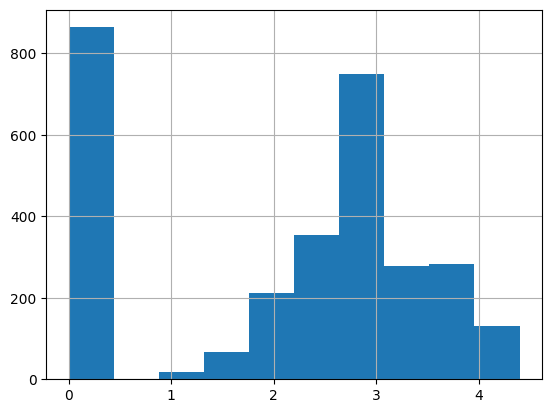

In [7]:
# Transformasi nilai discount dengan menggunakan fungsi log1p dari numpy, dan tampilkan histogram hasilnya
data_df['Discount'] = data_df.Discount.apply(np.log1p)
data_df.Discount.hist() 

other way

<Axes: >

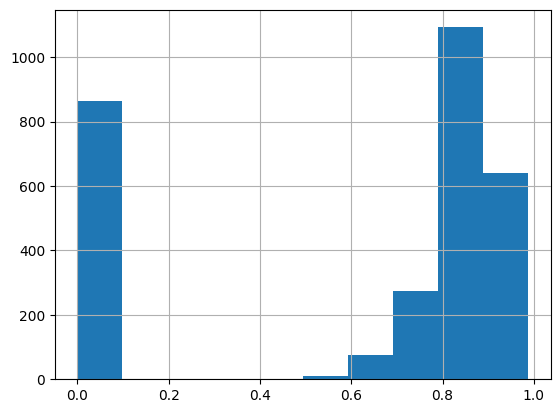

In [9]:
# Transformasi nilai discount dengan menggunakan fungsi log1p dari numpy, dan tampilkan histogram hasilnya
data_df['Discount'] = np.log1p(data_df['Discount'])
data_df['Discount'].hist() 

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            2955 non-null   object 
 1   Discount          2955 non-null   float64
 2   Top Product       2955 non-null   object 
 3   Top Cust Segment  2955 non-null   object 
 4   Top Branch        2955 non-null   object 
 5   Top Sub-Product   2955 non-null   object 
 6   Top City          2955 non-null   object 
 7   Top Ship Mode     2955 non-null   object 
 8   Month             2955 non-null   object 
 9   Label             2955 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 231.0+ KB


In [6]:
X = pd.concat([X_labels, X_dummies, data_df['Discount']], axis= 1)
y = data_df["Label"]
print(X.shape, y.shape)

(2955, 19) (2955,)


In [ ]:
data_df['Top Branch'].unique()

In [14]:
data_df['Label'].unique()

array([1, 0], dtype=int64)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (2216, 19) Y (2216,)
Data Test: X (739, 19) Y (739,)


In [16]:
dt_mod = DecisionTreeClassifier(random_state = 0)
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
y_pred_train = dt_mod.predict(X_train)

y_pred_test = dt_mod.predict(X_test)

In [18]:
acc_train = accuracy_score(y_train, y_pred_train)

# Akurasi pada dataset test
acc_test = accuracy_score(y_test, y_pred_test)

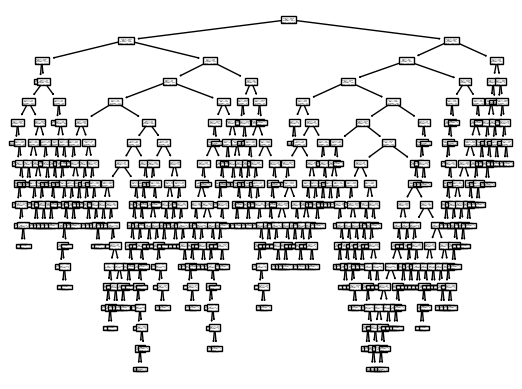

In [20]:
from sklearn.tree import plot_tree
plot_tree(dt_mod)
plt.show()

In [19]:
print('Akurasi Training', acc_train)
print('Akurasi Testing', acc_test)

print(classification_report(y_test, y_pred_test))

Akurasi Training 1.0
Akurasi Testing 0.8376184032476319
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       154
           1       0.90      0.90      0.90       585

    accuracy                           0.84       739
   macro avg       0.75      0.75      0.75       739
weighted avg       0.84      0.84      0.84       739



In [ ]:
gb_mod = GradientBoostingClassifier(random_state = 0)
gb_mod.fit(X_train, y_train)

# Analisis model Gradient Boosting
y_pred_train = gb_mod.predict(X_train)

y_pred_test = gb_mod.predict(X_test)

# Akurasi pada dataset training
acc_train = accuracy_score(y_train, y_pred_train)

# Akurasi pada dataset test
acc_test = accuracy_score(y_test, y_pred_test)

print('Akurasi Training', acc_train)
print('Akurasi Testing', acc_test)

print(classification_report(y_test, y_pred_test))